<a href="https://colab.research.google.com/github/yechan9601/python_digital_marketing/blob/main/Ch5_Product_Analysis_21801073JooYechan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

21801073 / 주예찬

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

[Online Retail Data Set (Online Retail.xlsx) - UCI ML Repo](https://archive.ics.uci.edu/ml/datasets/online+retail#)

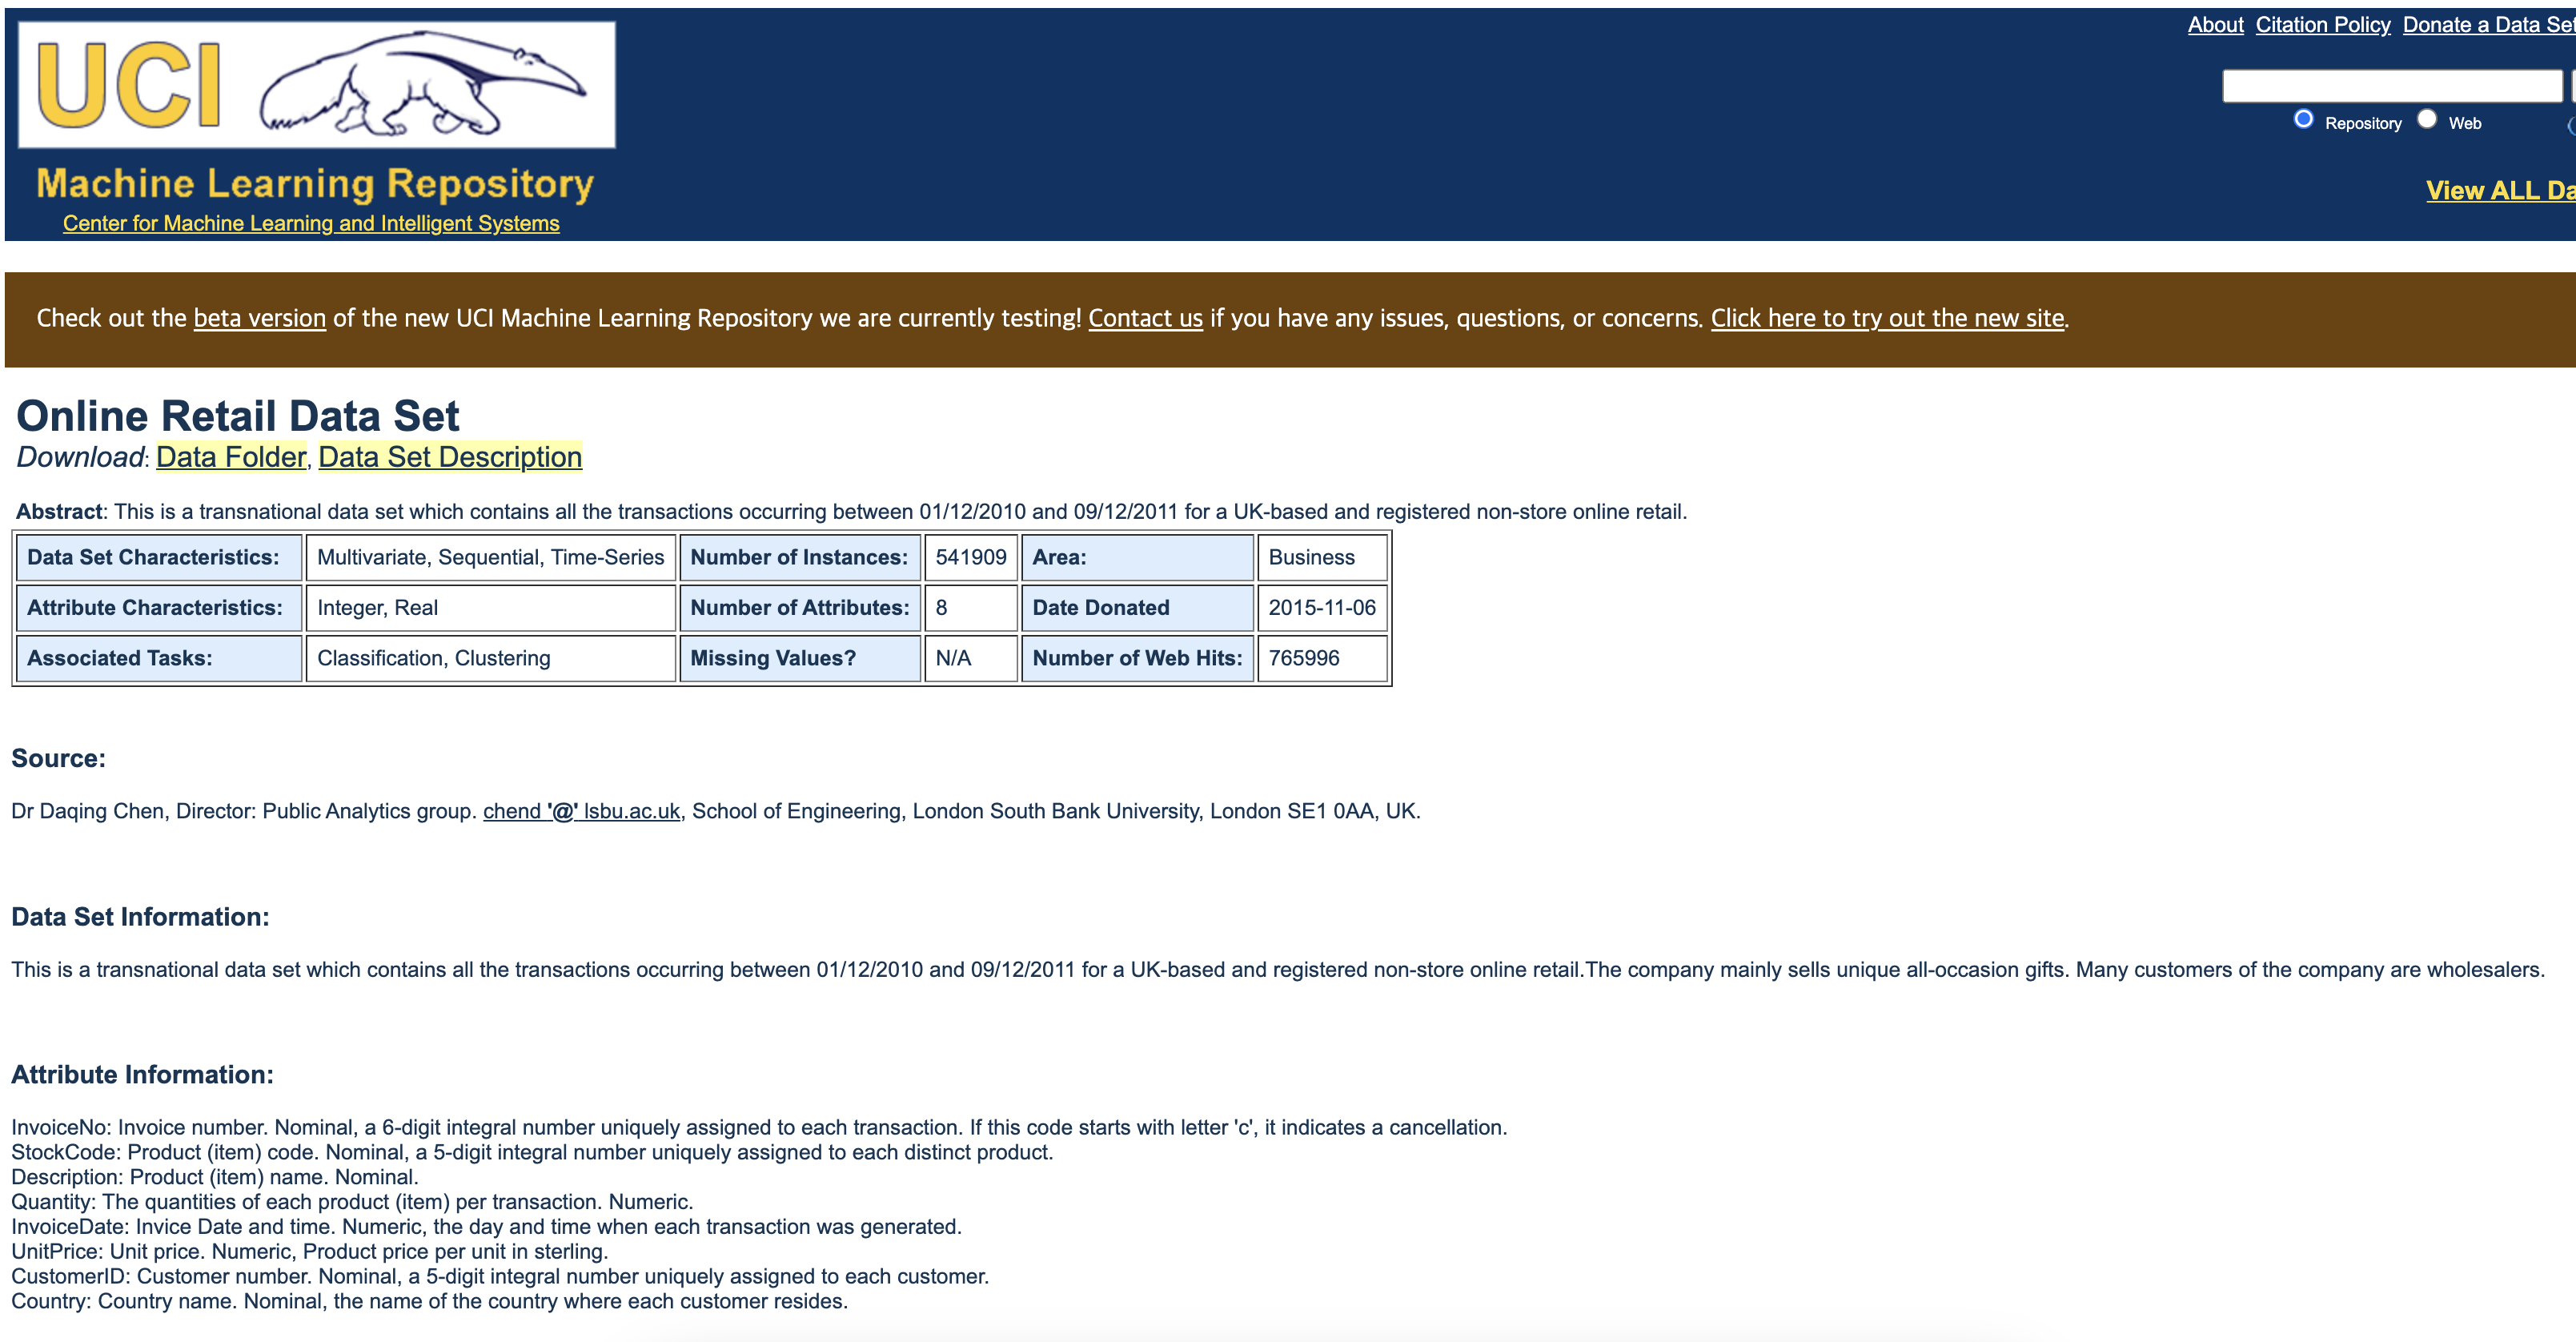

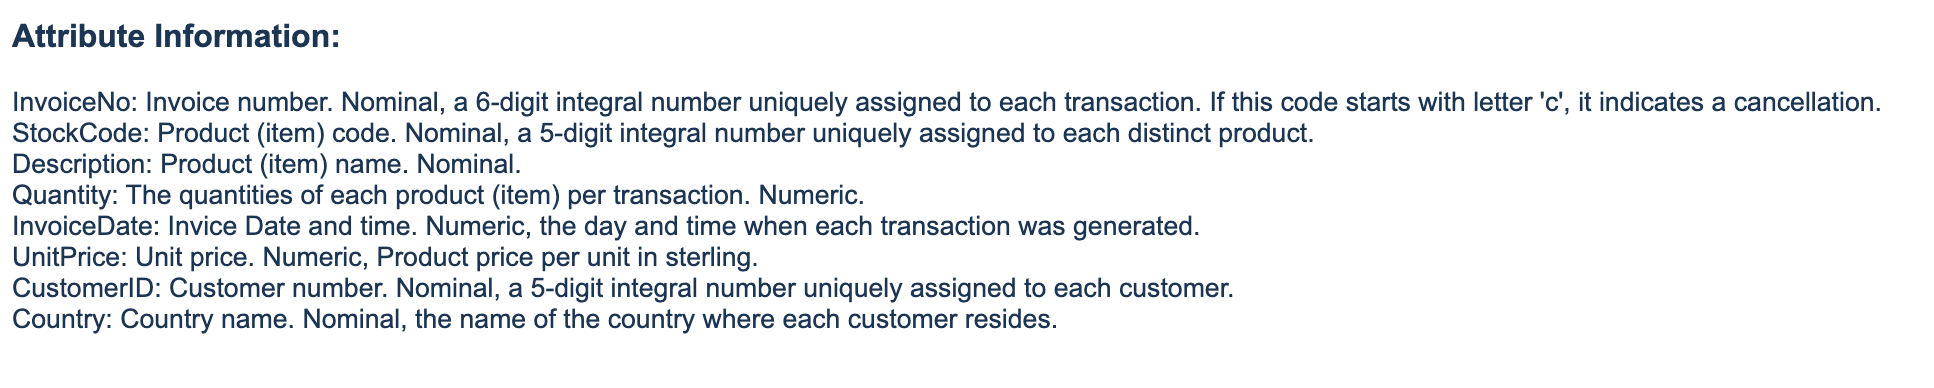

# 1. Importing

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/csv & excels/Online Retail.xlsx', sheet_name = 'Online Retail')

In [ ]:
df.shape

(541909, 8)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


*InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.*

InvoiceNo (송장번호)는 transaction마다 고유하게 부여된 번호. [ df.head()에서 중복된 값이 있는걸로 봐선 JOIN이 된 형태인듯함. ]

# 2. Product Analytics

## - Quantity Distribution

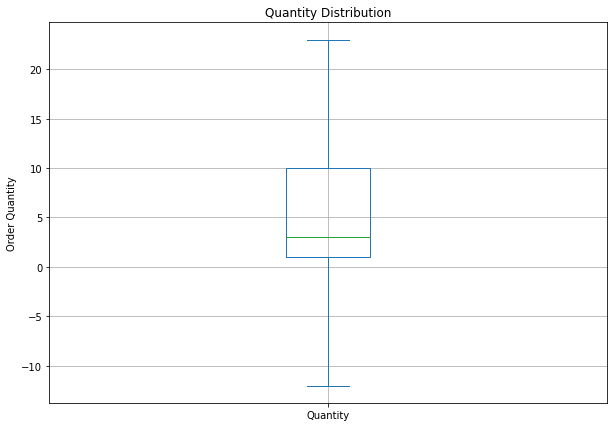

In [ ]:
ax = df['Quantity'].plot.box(
    showfliers=False,
    grid=True,
    figsize=(10, 7)
)

ax.set_ylabel('Order Quantity')
ax.set_title('Quantity Distribution')

plt.show()

In [ ]:
pd.DataFrame(df['Quantity'].describe())

,Quantity
count,541909.000000
mean,9.552250
std,218.081158
min,-80995.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,80995.000000


In [ ]:
df.loc[df['Quantity'] > 0].shape

(531285, 8)

In [ ]:
df.shape

(541909, 8)

In [ ]:
df = df.loc[df['Quantity'] > 0]

## 위의 세 코드라인의 목적은 무엇인가?

In [ ]:
"""

df.loc[df['Quantity'] > 0].shape
현재의 데이터프레임에서 Quantity(수량)이 0보다 크다는 조건을 적용하여 데이터프레임의 행렬 수를 보여준다. 수량이 0보다 큰 행은 531285개이다. 
(df에 아직 assign을 하지 않았으므로 데이터프레임은 그대로)

df.shape
현재 데이터프레임의 행렬 수. 조건을 적용하기 전에는 541909 행이 존재한다. 

df = df.loc[df['Quantity'] > 0]
데이터프레임에 해당 조건을 적용한 데이터프레임을 assign하여 기존 데이터프레임에서 수량이 0보다 크지 않은 행은 제거.

"""

"\n\ndf.loc[df['Quantity'] > 0].shape\n현재의 데이터프레임에서 Quantity(수량)이 0보다 크다는 조건을 적용하여 데이터프레임의 행렬 수를 보여준다. 수량이 0보다 큰 행은 531285개이다. \n(df에 아직 assign을 하지 않았으므로 데이터프레임은 그대로)\n\ndf.shape\n현재 데이터프레임의 행렬 수. 조건을 적용하기 전에는 541909 행이 존재한다. \n\ndf = df.loc[df['Quantity'] > 0]\n데이터프레임에 해당 조건을 적용한 데이터프레임을 assign하여 기존 데이터프레임에서 수량이 0보다 크지 않은 행은 제거.\n\n"

##Time-series Number of Orders

In [ ]:
monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique() # 'M'은 월별로 묶은 것.

In [ ]:
df.set_index('InvoiceDate')['InvoiceNo'].nunique()  # 매일 몇명의 고객이 고유한 주문을 했는지. 

20728

## set_index
source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html
Set the DataFrame index (row labels) using one or more existing columns or arrays. The index can replace the existing index or expand on it.

[set_index 사용법:](https://cosmosproject.tistory.com/337)

## resample:
resamples and converts time series data into the frequency we desire. in this case, resample time series data into monthly time series data by using 'M' as the target frequency and counting the number of distinct or unique invoice numbers
this way, we can get the number of unique purchase or orders month-on-month

In [ ]:
monthly_orders_df

InvoiceDate
2010-12-31    1629
2011-01-31    1120
2011-02-28    1126
2011-03-31    1531
2011-04-30    1318
2011-05-31    1731
2011-06-30    1576
2011-07-31    1540
2011-08-31    1409
2011-09-30    1896
2011-10-31    2129
2011-11-30    2884
2011-12-31     839
Freq: M, Name: InvoiceNo, dtype: int64

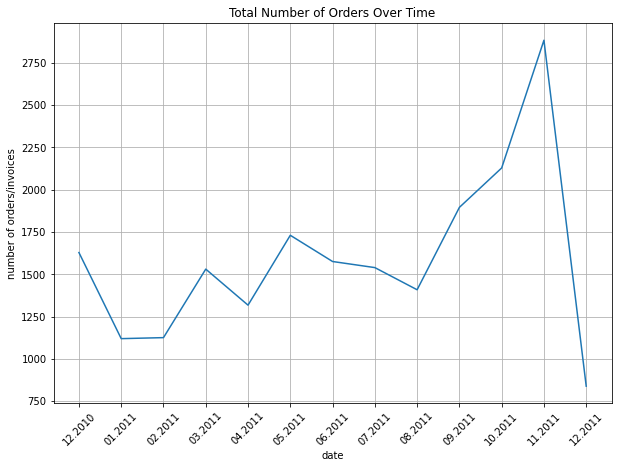

In [ ]:
ax = pd.DataFrame(monthly_orders_df.values).plot(
    grid=True,
    figsize=(10, 7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

plt.xticks(
    range(len(monthly_orders_df.index)),
    [x.strftime('%m.%Y') for x in monthly_orders_df.index],
    rotation=45
)

plt.show()

In [ ]:
# 그래프에서 12월부터 dramatic하게 줄어든 모습을 볼 수 있다. 왜 그런지 찾아보자. 
invoice_dates = df.loc[
    df['InvoiceDate'] >= '2011-12-01',
    'InvoiceDate'
]

In [ ]:
print('Min date: %s\nMax date: %s' % (invoice_dates.min(), invoice_dates.max())) # 12월은 9일까지의 데이터밖에 없었기 때문인듯하다...

Min date: 2011-12-01 08:33:00
Max date: 2011-12-09 12:50:00


In [ ]:
df.loc[df['InvoiceDate'] < '2011-12-01'].shape

(506150, 8)

In [ ]:
df.shape

(531285, 8)

In [ ]:
df = df.loc[df['InvoiceDate'] < '2011-12-01'] # 12월 1일 이후 데이터는 제거.

In [ ]:
monthly_orders_df = df.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()

In [ ]:
monthly_orders_df # 11월 30일까지의 df.

InvoiceDate
2010-12-31    1629
2011-01-31    1120
2011-02-28    1126
2011-03-31    1531
2011-04-30    1318
2011-05-31    1731
2011-06-30    1576
2011-07-31    1540
2011-08-31    1409
2011-09-30    1896
2011-10-31    2129
2011-11-30    2884
Freq: M, Name: InvoiceNo, dtype: int64

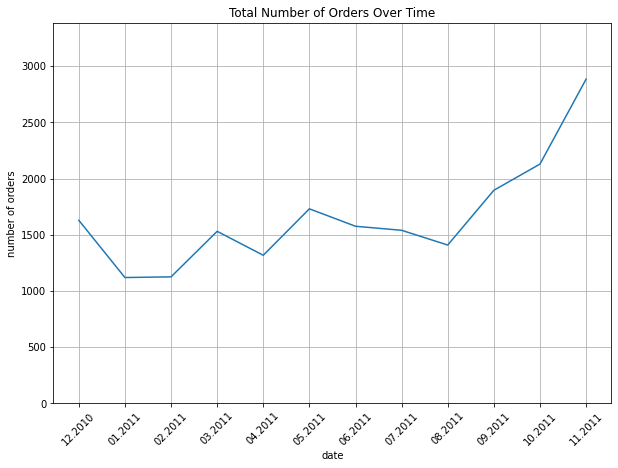

In [ ]:
# 다시 정상적인 데이터로 plot.
ax = pd.DataFrame(monthly_orders_df.values).plot(
    grid=True,
    figsize=(10, 7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders')
ax.set_title('Total Number of Orders Over Time')

ax.set_ylim([0, max(monthly_orders_df.values) + 500])

plt.xticks(
    range(len(monthly_orders_df.index)),
    [x.strftime('%m.%Y') for x in monthly_orders_df.index],
    rotation=45
)

plt.show()

** why increase significantly from September 2011 and almost double by Nov 2011?**

2011-09-30 : 1896 orders

2011-11-30 : 2884 orders

## - Time-series Revenue

In [ ]:
df['Sales'] = df['Quantity'] * df['UnitPrice'] # 수량과 가격을 곱해 'Sales'라는 column 생성.

In [ ]:
# key='InvoiceDate', resample by month, sum of sales at 'Sales'
monthly_revenue_df = df.set_index('InvoiceDate')['Sales'].resample('M').sum()

In [ ]:
monthly_revenue_df

InvoiceDate
2010-12-31     823746.140
2011-01-31     691364.560
2011-02-28     523631.890
2011-03-31     717639.360
2011-04-30     537808.621
2011-05-31     770536.020
2011-06-30     761739.900
2011-07-31     719221.191
2011-08-31     737014.260
2011-09-30    1058590.172
2011-10-31    1154979.300
2011-11-30    1509496.330
Freq: M, Name: Sales, dtype: float64

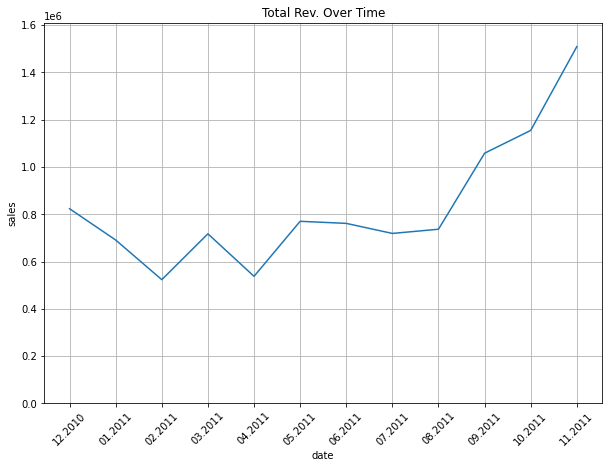

In [ ]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(
    grid=True,
    figsize=(10, 7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Rev. Over Time')

ax.set_ylim([0, max(monthly_revenue_df.values) + 100000])

plt.xticks(
    range(len(monthly_revenue_df.index)),
    [x.strftime('%m.%Y') for x in monthly_revenue_df.index],
    rotation=45
)

plt.show()

## - Time-series Repeat Customers

analyze the number of monthly repeat purchases and how much of the monthly revenue is attributable to these repeat purchases and customers

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


multiple records for one purchase order

what we need is the aggregate data for each order, so that one record represents one purchase order

동일 고객아이디 별로 같은 주문일에 여러 개의 주문이 존재함 --> 한 주문일, 한 고객아이디별로 합계를 냄

In [ ]:
invoice_customer_df = df.groupby(
    by=['InvoiceNo', 'InvoiceDate']
).agg({
    'Sales' : sum,
    'CustomerID' : max,
    'Country' : max,
}).reset_index()

In [ ]:
invoice_customer_df.head()

,InvoiceNo,InvoiceDate,Sales,CustomerID,Country
0,536365,2010-12-01 08:26:00,139.12,17850.0,United Kingdom
1,536366,2010-12-01 08:28:00,22.20,17850.0,United Kingdom
2,536367,2010-12-01 08:34:00,278.73,13047.0,United Kingdom
3,536368,2010-12-01 08:34:00,70.05,13047.0,United Kingdom
4,536369,2010-12-01 08:35:00,17.85,13047.0,United Kingdom


aggregate data per month and compute the number of customers who made more than one purchase in a given month

In [ ]:
# 월별로 grouping 한 뒤, CustomerID별로 grouping
# 월별로 반복하여 주문한 데이터를 불러오기 위해: 주문량이 1보다 큰, 즉 그룹별 CustomerID가 1보다 많은 것으로 filtering.
monthly_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']

pd.Grouper(freq='M') : groups the data by the index 'InvoiceDate' into each month then group this data by each 'CustomerID'

subselect using filtering rule 'x: len(x)>1' means retrieving only those customers with more than one order in a given month

In [ ]:
monthly_repeat_customers_df

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: M, Name: CustomerID, dtype: int64

In [ ]:
monthly_unique_customer_df = df.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()

In [ ]:
monthly_unique_customer_df

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
Freq: M, Name: CustomerID, dtype: int64

In [ ]:
# 월별 전체 고객중 반복적으로 주문하는 고객의 비율은?
monthly_repeat_percentage = monthly_repeat_customers_df / monthly_unique_customer_df * 100.0

monthly_repeat_percentage

InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.184697
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.492492
Freq: M, Name: CustomerID, dtype: float64

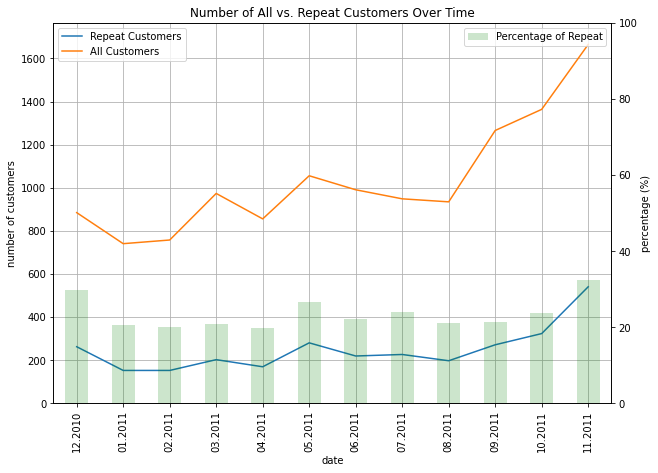

In [ ]:
# plot repeat customers
ax = pd.DataFrame(monthly_repeat_customers_df.values).plot(
    figsize=(10,7)
)

# plot all customers
pd.DataFrame(monthly_unique_customer_df.values).plot(
    ax=ax,
    grid=True
)

# plot percentage of repeat customer
ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(
    ax=ax,
    grid=True,
    secondary_y=True,
    color='green',
    alpha=0.2
)

ax.set_xlabel('date')
ax.set_ylabel('number of customers')
ax.set_title('Number of All vs. Repeat Customers Over Time')

ax2.set_ylabel('percentage (%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')

ax.set_ylim([0, monthly_unique_customer_df.values.max() + 100])
ax2.set_ylim([0, 100])

plt.xticks(
    range(len(monthly_repeat_customers_df.index)),
    [x.strftime('%m.%Y') for x in monthly_repeat_customers_df.index],
    rotation=45
)

plt.show()

## - Revenue from Repeat Customers

In [ ]:
monthly_rev_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID'
]).filter(lambda x: len(x) > 1).resample('M').sum()['Sales']

In [ ]:
monthly_rev_perc_repeat_customers_df = monthly_rev_repeat_customers_df / monthly_revenue_df * 100.0
monthly_rev_perc_repeat_customers_df

InvoiceDate
2010-12-31    43.602098
2011-01-31    32.128346
2011-02-28    36.519810
2011-03-31    37.259729
2011-04-30    36.346420
2011-05-31    49.082331
2011-06-30    49.401017
2011-07-31    44.141497
2011-08-31    43.029595
2011-09-30    47.295296
2011-10-31    49.698455
2011-11-30    47.285696
Freq: M, Name: Sales, dtype: float64

In [ ]:
monthly_rev_repeat_customers_df

InvoiceDate
2010-12-31    359170.60
2011-01-31    222124.00
2011-02-28    191229.37
2011-03-31    267390.48
2011-04-30    195474.18
2011-05-31    378197.04
2011-06-30    376307.26
2011-07-31    317475.00
2011-08-31    317134.25
2011-09-30    500663.36
2011-10-31    574006.87
2011-11-30    713775.85
Freq: M, Name: Sales, dtype: float64

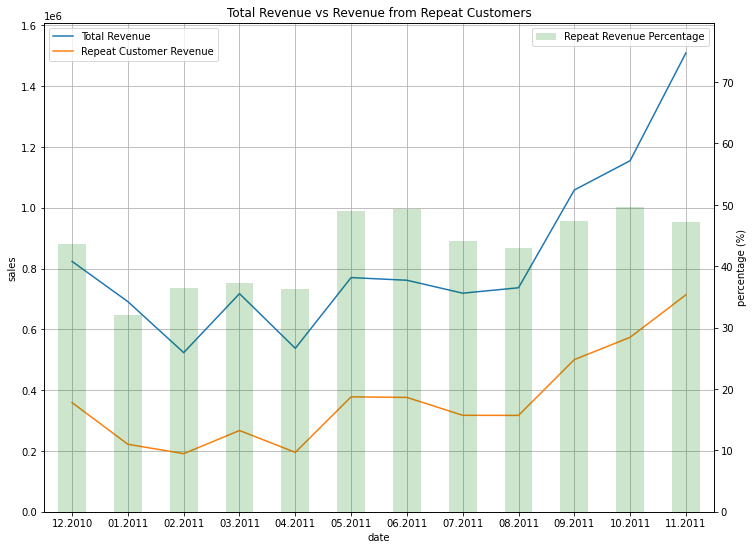

In [ ]:
# plot total Rev.
ax = pd.DataFrame(monthly_revenue_df.values).plot(
    figsize=(12,9)
)

# plot Repeated Rev.
pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(
    ax=ax,
    grid=True,
)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs Revenue from Repeat Customers')

ax.legend(['Total Revenue', 'Repeat Customer Revenue'])

ax.set_ylim([0, max(monthly_revenue_df.values) + 100000])

ax2 = ax.twinx() # essentially does the same job as the 'secondary_y' flag

pd.DataFrame(monthly_rev_perc_repeat_customers_df.values).plot(
    ax=ax2,
    kind='bar',
    color='g',
    alpha=0.2
)

ax2.set_ylim([0, max(monthly_rev_perc_repeat_customers_df.values)+30])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])

ax2.set_xticklabels([
    x.strftime('%m.%Y') for x in monthly_rev_perc_repeat_customers_df.index
])

plt.show()

twinx function: simply creates a twin y axis that shares the same x axis and has the same effect as the secondary+y flag.

- Popular Items Over Time

look at the trends of the top five best-sellers over time

In [ ]:
date_item_df = pd.DataFrame(
    df.set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum()
)

date_item_df

Quantity
InvoiceDate StockCode          
2010-12-31  10002           251
            10120            16
            10125           154
            10133           130
            10135           411
...                         ...
2011-11-30  C2              173
            DCGSSGIRL         1
            DOT              47
            M              3894
            POST           1262

[31701 rows x 1 columns]

In [ ]:
# Rank items by the last month sales
last_month_sorted_df = date_item_df.loc['2011-11-30'].sort_values(
    by='Quantity', ascending=False
).reset_index()

last_month_sorted_df

,InvoiceDate,StockCode,Quantity
0,2011-11-30,23084,14954
1,2011-11-30,84826,12551
2,2011-11-30,22197,12460
3,2011-11-30,22086,7908
4,2011-11-30,85099B,5909
...,...,...,...
2941,2011-11-30,84549,1
2942,2011-11-30,84527,1
2943,2011-11-30,90082B,1
2944,2011-11-30,90082D,1


In [ ]:
# Regroup for top 5 items
date_item_df = pd.DataFrame(
    df.loc[
        df['StockCode'].isin([23084, 84826, 22197, 22086, '85099B'])
    ].set_index('InvoiceDate').groupby([
        pd.Grouper(freq='M'), 'StockCode'
    ])['Quantity'].sum()
)

date_item_df

Quantity
InvoiceDate StockCode          
2010-12-31  22086          2460
            22197          2738
            84826           366
            85099B         2152
2011-01-31  22086            24
            22197          1824
            84826           480
            85099B         2747
2011-02-28  22086             5
            22197          2666
            84826            66
            85099B         3080
2011-03-31  22086            87
            22197          2803
            84826            60
            85099B         5282
2011-04-30  22086            13
            22197          1869
            84826             1
            85099B         2456
2011-05-31  22086            17
            22197          6849
            23084          1131
            85099B         3621
2011-06-30  22086           344
            22197          2095
            23084          1713
            84826             4
            85099B         3682
2011-07-31  22086           383
            22197          1876
            23084           318
            84826             2
            85099B         3129
2011-08-31  22086           490
            22197          5421
            23084          2267
            84826            72
            85099B         5502
2011-09-30  22086          2106
            22197          4196
            23084           680
            85099B         4401
2011-10-31  22086          3429
            22197          5907
            23084          6348
            84826            11
            85099B         5412
2011-11-30  22086          7908
            22197         12460
            23084         14954
            84826         12551
            85099B         5909

In [ ]:
trending_items_df = date_item_df.reset_index().pivot('InvoiceDate', 'StockCode').fillna(0)

trending_items_df = trending_items_df.reset_index()
trending_items_df = trending_items_df.set_index('InvoiceDate')

# droplevel 메서드는 Multi Index나 Multi Columns에서 특정 레벨을 제거하는 메서드. column의 level 0인 'Quantity'를 제거.
trending_items_df.columns = trending_items_df.columns.droplevel(0)


trending_items_df

StockCode,22086,22197,23084,84826,85099B
InvoiceDate,,,,,
2010-12-31,2460.0,2738.0,0.0,366.0,2152.0
2011-01-31,24.0,1824.0,0.0,480.0,2747.0
2011-02-28,5.0,2666.0,0.0,66.0,3080.0
2011-03-31,87.0,2803.0,0.0,60.0,5282.0
2011-04-30,13.0,1869.0,0.0,1.0,2456.0
2011-05-31,17.0,6849.0,1131.0,0.0,3621.0
2011-06-30,344.0,2095.0,1713.0,4.0,3682.0
2011-07-31,383.0,1876.0,318.0,2.0,3129.0
2011-08-31,490.0,5421.0,2267.0,72.0,5502.0


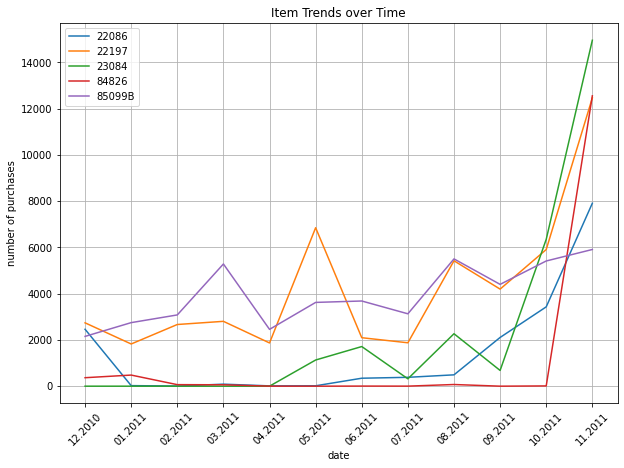

In [ ]:
ax = pd.DataFrame(trending_items_df.values).plot(
    figsize=(10, 7),
    grid=True,
)

ax.set_ylabel('number of purchases')
ax.set_xlabel('date')
ax.set_title('Item Trends over Time')

ax.legend(trending_items_df.columns, loc='upper left')

plt.xticks(
    range(len(trending_items_df.index)),
    [x.strftime('%m.%Y') for x in trending_items_df.index],
    rotation=45
)

plt.show()